In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [107]:
# Load the datasets
X_train = pd.read_csv('/home/zeynep/ORIS/data/X_train.csv')
Y_train = pd.read_csv('/home/zeynep/ORIS/data/Y_train.csv')
X_test = pd.read_csv('/home/zeynep/ORIS/data/X_test.csv')

In [108]:
# Extract relevant features: latitude, longitude, and site_type
X = X_train[['latitude', 'longitude']]
y = Y_train['output']

In [109]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['latitude', 'longitude'])
    ]
)

In [110]:
# Split the data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
# Define a list of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

In [99]:
# Initialize variables to keep track of the best model and its accuracy
best_model_name = None
best_model = None
best_accuracy = 0

In [112]:
# Create a pipeline with polynomial features, standard scaling, and RandomForest
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Add polynomial features
    ('scaler', StandardScaler()),            # Standard scaling
    ('model', RandomForestClassifier())      # Random Forest model
])


In [113]:
# Define hyperparameters to tune
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2, 4],
}

In [114]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_split, y_train_split)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [10, 20, None],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='f1')

In [115]:
# Best model and its parameters
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 200}


In [116]:
# Validate the best model
y_val_pred = best_model.predict(X_val)
val_f1_score = f1_score(y_val, y_val_pred)

print(f"Validation F1 Score: {val_f1_score:.4f}")

Validation F1 Score: 0.5507


In [117]:
# Validate the model on the validation set
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

In [118]:
print(f'Best model: {best_model_name}, Validation accuracy: {val_accuracy:.4f}')


Best model: Random Forest, Validation accuracy: 0.5529


In [119]:
# Evaluation: Confusion Matrix, F1 Score, Precision, Recall
conf_matrix = confusion_matrix(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Confusion Matrix:
[[58 57]
 [36 57]]
F1 Score: 0.5507
Precision: 0.5000
Recall: 0.6129


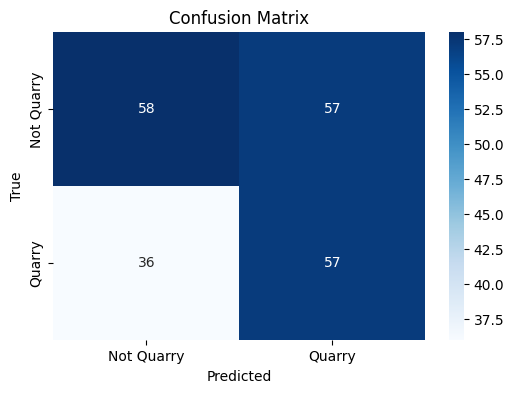

In [120]:
# Visualize the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Quarry', 'Quarry'], yticklabels=['Not Quarry', 'Quarry'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [121]:
# Extract relevant features (latitude and longitude) from the test set
scaler = StandardScaler()
X_test_features = X_test[['latitude', 'longitude']]
X_test_features = scaler.fit_transform(X_test_features)

In [122]:
# Use the best model to predict on the test set
y_test_pred = best_model.predict(X_test_features)


/home/zeynep/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [123]:
# Create a DataFrame for the predicted results
Y_test_pred_df = pd.DataFrame({'output': y_test_pred})

In [124]:
# Save the predictions to a CSV file
Y_test_pred_df.to_csv('/home/zeynep/ORIS/data/Y_test_ML.csv', index=False)
